In [1]:
import pandas as pd
from datetime import datetime as dt, date
import seaborn as sns

In [2]:
from kiblib.utils.db import DbConn

In [3]:
db_conn = DbConn().create_engine()

In [4]:
query = """SELECT * 
FROM statdb.stat_entrees
WHERE YEAR(`datetime`) >= 2022

"""

In [5]:
entrees = pd.read_sql(query,db_conn)

In [6]:
entrees

,datetime,entrees
0,2022-01-04 09:00:00,38
1,2022-01-04 10:00:00,61
2,2022-01-04 11:00:00,58
3,2022-01-04 12:00:00,47
4,2022-01-04 13:00:00,36
...,...,...
4926,2023-10-15 13:00:00,1
4927,2023-10-15 14:00:00,235
4928,2023-10-15 15:00:00,143
4929,2023-10-15 16:00:00,121


In [7]:
entrees['date'] = pd.DatetimeIndex(entrees['datetime']).date
entrees['semaine'] = pd.DatetimeIndex(entrees['datetime']).week
entrees['jour'] = pd.DatetimeIndex(entrees['datetime']).day_name(locale='fr_FR.utf8')
entrees['annee'] = pd.DatetimeIndex(entrees['datetime']).year

/tmp/ipykernel_32237/1795214600.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  entrees['semaine'] = pd.DatetimeIndex(entrees['datetime']).week


In [8]:
entrees

,datetime,entrees,date,semaine,jour,annee
0,2022-01-04 09:00:00,38,2022-01-04,1,Mardi,2022
1,2022-01-04 10:00:00,61,2022-01-04,1,Mardi,2022
2,2022-01-04 11:00:00,58,2022-01-04,1,Mardi,2022
3,2022-01-04 12:00:00,47,2022-01-04,1,Mardi,2022
4,2022-01-04 13:00:00,36,2022-01-04,1,Mardi,2022
...,...,...,...,...,...,...
4926,2023-10-15 13:00:00,1,2023-10-15,41,Dimanche,2023
4927,2023-10-15 14:00:00,235,2023-10-15,41,Dimanche,2023
4928,2023-10-15 15:00:00,143,2023-10-15,41,Dimanche,2023
4929,2023-10-15 16:00:00,121,2023-10-15,41,Dimanche,2023


In [9]:
entrees_dimanche = entrees[entrees['jour']=='Dimanche']

In [10]:
total_entrees_dimanche = entrees_dimanche.groupby(['annee','date','semaine'])['entrees'].sum().reset_index()

In [11]:
semaine_max = date.today().isocalendar()[1] - 1
semaine_min = semaine_max - 4

In [12]:
total_entrees_dimanche = total_entrees_dimanche[total_entrees_dimanche['semaine'].between(semaine_min,semaine_max)]

In [13]:
from kiblib.utils import lucas_sns_params

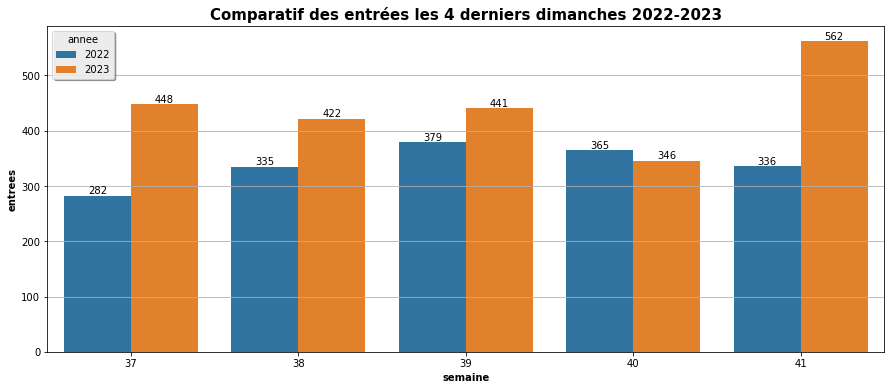

In [15]:
ax = sns.barplot(data=total_entrees_dimanche,x='semaine',y='entrees',hue='annee')
ax.set_title("Comparatif des entrées les 4 derniers dimanches 2022-2023")

for i in ax.containers:
    ax.bar_label(i,)